In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('Data_Listdeal.xlsx')
df

,Antrian,ID SPK,Tipe Order,CS,Konsumen,Penulis,Tgl Masuk Naskah,Tgl Mulai Proses,No Telp,Alamat,Email,Judul Naskah,Tanggal Deal,ISBN,Sales_Order,Kuantitas,Alamat Kirim,Nurturing,Deadline
0,NaN,6285,order,Gupita-CS 11,BUDI SASTRA PANJAITAN,"Dr. BUDI SASTRA PANJAITAN, S.H., M.Hum. Editor...",2023-05-04 13:19:00,2023-05-04 13:19:00,81262418806,NaN,budisastrapanjaitan@uinsu.ac.id,HUKUM BISNIS SUDUT PANDANG ADVOKAT (CETAK ULANG),2023-05-04,978-623-02-6246-3,3234000,22,AYU ANDIRA(082273624915) Alamat Kirim Buku : D...,Nurturing2,2023-05-09
1,NaN,6278,cetak ulang,Galuh-CS 4,Febrina Sari,Febrina Sari,2023-05-03 09:59:00,2023-05-03 09:59:00,85263394975,NaN,febri_ghaniya@yahoo.co.id,Metode Dalam Pengambilan Keputusan (reorder) (...,2023-05-03,NaN,5720000,55,Febrina Sari 085263394975 d/a : Sekolah Tinggi...,Nurturing,2023-05-20
2,NaN,6276,cetak ulang,Jefry-CS 3,"Arief Tasrig Nur Gomo, STP, MSi.","Arief Tasrig Nur Gomo, STP, MSi.",2023-05-02 13:38:00,2023-05-02 13:38:00,8129294267,NaN,arieftnurgomo@gmail.com,Healthy Food & 25 Ideas of Healthy Cooking (CE...,2023-05-03,978-623-02-2727-1,4300000,50,"Arief Tasrig Nur Gomo, STP, MSi.( 08129294267 ...",Nurturing,2023-05-19
3,NaN,6272,cetak ulang,Gupita-CS 11,BUDI SASTRA PANJAITAN,"Dr. BUDI SASTRA PANJAITAN, S.H., M.Hum. Editor...",2023-04-28 08:16:00,2023-04-28 08:16:00,81262418806,NaN,budisastrapanjaitan@uinsu.ac.id,HUKUM BISNIS SUDUT PANDANG ADVOKAT (CETAK ULANG),2023-04-28,978-623-02-6246-3,8024001,61,wahyu Triono putra (082127685484) jalan suluk ...,Nurturing2,2023-05-03
4,NaN,6258,order ebook,Vivin-CS 10,Mukhlis Akhadi,Mukhlis Akhadi,2023-04-18 13:29:00,2023-04-18 13:29:00,81411147855,NaN,mukh001@brin.go.id,Radioekologi Radionuklida Kosmogenik (CETAK UL...,2023-04-18,978-623-02-3753-9,1100000,1,Mukhlis Akhadi 0814 1114 7855 Perumahan Batan ...,Nurturing,2023-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,9999,990,order,Vivin-CS 10,"Drs. Isma Tantawi, M.A.","Drs. Isma Tantawi, M.A.",2019-05-27 14:29:00,2019-07-10 10:56:00,8126543562,NaN,ismafibusu@gmail.com,Saman: Tari Tangan Seribu dari Dataran Tinggi ...,2020-05-12,978-623-02-0980-2,2902500,25,"Jl. Flamboyan Raya/Mawar, Gang Kesuma Nomor 7 ...",Nurturing2,2020-05-12
5152,655,677,order,Prasida-CS 2,"Mesrida Simarmata, SST, M. Biomed","MESRIDA SIMARMATA, SST, M. BIOMED",2019-06-27 09:04:00,2019-06-27 09:04:00,85276008527,NaN,mesridasimarta@yahoo.co.id,Buku Kehamilan,2020-01-27,978-623-02-0547-7,2960000,50,"Jalan Menteng VII No 94, Menteng, Medan Denai,...",NaN,2020-02-01
5153,NaN,49,order,Jefry-CS 3,Timbo Mangaranap Sirait,Timbo Mangaranap Sirait,2019-06-17 14:21:00,2019-06-17 14:22:00,85322001957,NaN,the.timeslawfirm@gmail.com,HUKUM PIDANA PAJAK INDONESIA (Materiil dan For...,2019-07-12,978-623-209-841-1,9984000,260,Times Law Firm Green Palace Kalibata City Towe...,Nurturing,2019-07-31
5154,211,993,order,Prasida-CS 2,Syamsul Arifin (Been Suyat),Been Suyat,2019-05-29 08:42:00,2019-05-29 08:46:00,81937559054,NaN,binsuyat@gmail.com,STRATEGI JITU BERKOMUNIKASI DENGAN ANAK,2020-05-08,978-623-02-0962-8,3576000,12,Alamat pengiriman Muhammad Jiddan Masjid Al Ih...,Nurturing,2020-06-06


In [3]:
#Cek data yang kosong
df.isnull().sum() 

Antrian              715
ID SPK                 0
Tipe Order             0
CS                     0
Konsumen               0
Penulis                0
Tgl Masuk Naskah       0
Tgl Mulai Proses       0
No Telp                0
Alamat              5151
Email                  0
Judul Naskah           0
Tanggal Deal           0
ISBN                 718
Sales_Order            0
Kuantitas              0
Alamat Kirim           0
Nurturing           1617
Deadline              22
dtype: int64

In [4]:
#Pemilihan Atribut

df1 = df.drop(columns=['ID SPK','Antrian','Tipe Order','CS','Konsumen','Penulis',
                       'Tgl Mulai Proses','Tgl Mulai Proses', 'No Telp','Alamat','Judul Naskah',
                       'ISBN','Alamat Kirim','Nurturing','Deadline','Kuantitas','Tgl Masuk Naskah'])
df1

,Email,Tanggal Deal,Sales_Order
0,budisastrapanjaitan@uinsu.ac.id,2023-05-04,3234000
1,febri_ghaniya@yahoo.co.id,2023-05-03,5720000
2,arieftnurgomo@gmail.com,2023-05-03,4300000
3,budisastrapanjaitan@uinsu.ac.id,2023-04-28,8024001
4,mukh001@brin.go.id,2023-04-18,1100000
...,...,...,...
5151,ismafibusu@gmail.com,2020-05-12,2902500
5152,mesridasimarta@yahoo.co.id,2020-01-27,2960000
5153,the.timeslawfirm@gmail.com,2019-07-12,9984000
5154,binsuyat@gmail.com,2020-05-08,3576000


In [5]:
#menampilkan informasi dari dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Email         5156 non-null   object        
 1   Tanggal Deal  5156 non-null   datetime64[ns]
 2   Sales_Order   5156 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 121.0+ KB


In [6]:
#Menghitung Nilai Recency

df_recency = df1.groupby(by='Email', as_index=False)['Tanggal Deal'].max()

df_recency.columns = ['Email_Cust', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency

,Email_Cust,LastPurchaseDate,Recency
0,07202023@spidi.my.id,2022-10-04,216
1,0812ibnu@gmail.com,2023-05-03,5
2,163202504@uii.ac.id,2023-04-04,34
3,16sangadji@gmail.com,2023-04-12,26
4,173220501@uii.ac.id,2021-08-03,643
...,...,...,...
2878,zulkifliyusuf120@gmail.com,2022-11-07,182
2879,zulkiflymuhammad@yahoo.co.id,2022-03-15,419
2880,zulvyahfaisal@poliupg.ac.id,2022-11-02,187
2881,zuma.yakuza@gmail.com,2023-01-16,112


In [7]:
#Menghitung nilai Frequency

frequency_df = df1.drop_duplicates().groupby(by=['Email'], as_index=False)['Tanggal Deal'].count()
frequency_df.columns = ['Email_Cust', 'Frequency']
frequency_df

,Email_Cust,Frequency
0,07202023@spidi.my.id,1
1,0812ibnu@gmail.com,5
2,163202504@uii.ac.id,1
3,16sangadji@gmail.com,1
4,173220501@uii.ac.id,1
...,...,...
2878,zulkifliyusuf120@gmail.com,1
2879,zulkiflymuhammad@yahoo.co.id,1
2880,zulvyahfaisal@poliupg.ac.id,1
2881,zuma.yakuza@gmail.com,1


In [8]:
#Menghitung nilai Monetary
monetary_df = df.groupby(by='Email', as_index=False)['Sales_Order'].sum()
monetary_df.columns = ['Email_Cust', 'Monetary']
monetary_df.head()

,Email_Cust,Monetary
0,07202023@spidi.my.id,8727264
1,0812ibnu@gmail.com,8646000
2,163202504@uii.ac.id,3000000
3,16sangadji@gmail.com,2925000
4,173220501@uii.ac.id,2200000


In [9]:
#Menggabungkan Recency,Frequency, dan Monetary

rf_df = df_recency.merge(frequency_df, on='Email_Cust')
rfm_df = rf_df.merge(monetary_df, on='Email_Cust').drop(columns='LastPurchaseDate')
rfm_df

,Email_Cust,Recency,Frequency,Monetary
0,07202023@spidi.my.id,216,1,8727264
1,0812ibnu@gmail.com,5,5,8646000
2,163202504@uii.ac.id,34,1,3000000
3,16sangadji@gmail.com,26,1,2925000
4,173220501@uii.ac.id,643,1,2200000
...,...,...,...,...
2878,zulkifliyusuf120@gmail.com,182,1,1100000
2879,zulkiflymuhammad@yahoo.co.id,419,1,12000000
2880,zulvyahfaisal@poliupg.ac.id,187,1,4225000
2881,zuma.yakuza@gmail.com,112,1,2975000


In [10]:
#Validasi data, apakah rfm sudah benar atau belum?

cust1 = rfm_df[rfm_df['Email_Cust']=='07202023@spidi.my.id']
cust1

,Email_Cust,Recency,Frequency,Monetary
0,07202023@spidi.my.id,216,1,8727264


In [11]:
quantiles = rfm_df.quantile(q=[0, 0.25, 0.5, 0.75])
quantiles

,Recency,Frequency,Monetary
0.00,0.0,1.0,1000000.0
0.25,146.5,1.0,2704000.0
0.50,383.0,1.0,4400000.0
0.75,760.0,2.0,8105000.0


In [12]:
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.0: 0.0, 0.25: 146.5, 0.5: 383.0, 0.75: 760.0},
 'Frequency': {0.0: 1.0, 0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.0: 1000000.0,
  0.25: 2704000.0,
  0.5: 4400000.0,
  0.75: 8105000.0}}

In [13]:
RFMSegmentation = rfm_df

In [14]:
#Segmentasi RFM Method
def RClass(x,p,d):
    if x <= d[p][0]:
        return 4
    elif x <= d[p][0.25]:
        return 3
    elif x <= d[p][0.50]:
        return 2
    else:
        return 1
    RClass()

In [15]:
#Segmentasi RFM Method
def FMClass(x,p,d):
    if x <= d[p][0]:
        return 1
    elif x <= d[p][0.25]:
        return 2
    elif x <=d[p][0.50]:
        return 3
    else:
        return 4
    FMClass()

In [16]:
RFMSegmentation['R_Quartile'] = RFMSegmentation['Recency'].apply(RClass, args=('Recency', quantiles,))
RFMSegmentation['F_Quartile'] = RFMSegmentation['Frequency'].apply(FMClass, args=('Frequency', quantiles,))
RFMSegmentation['M_Quartile'] = RFMSegmentation['Monetary'].apply(FMClass, args=('Monetary', quantiles,))

In [17]:
RFMSegmentation['RFMClass'] = RFMSegmentation.R_Quartile.map(str) \
                            + RFMSegmentation.F_Quartile.map(str) \
                            + RFMSegmentation.M_Quartile.map(str)

In [18]:
# Calculate RFM_Score
RFMSegmentation['RFM_Score'] = RFMSegmentation[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)

In [22]:
RFMSegmentation

,Email_Cust,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,RFM_Level
0,07202023@spidi.my.id,216,1,8727264,2,1,4,214,7,Potential
1,0812ibnu@gmail.com,5,5,8646000,3,4,4,344,11,Cannot Loose Them
2,163202504@uii.ac.id,34,1,3000000,3,1,3,313,7,Potential
3,16sangadji@gmail.com,26,1,2925000,3,1,3,313,7,Potential
4,173220501@uii.ac.id,643,1,2200000,1,1,2,112,4,Activation Needed
...,...,...,...,...,...,...,...,...,...,...
2878,zulkifliyusuf120@gmail.com,182,1,1100000,2,1,2,212,5,Activation Needed
2879,zulkiflymuhammad@yahoo.co.id,419,1,12000000,1,1,4,114,6,Potential
2880,zulvyahfaisal@poliupg.ac.id,187,1,4225000,2,1,3,213,6,Potential
2881,zuma.yakuza@gmail.com,112,1,2975000,3,1,3,313,7,Potential


In [79]:
RFMSegmentation.to_excel('RFMSegmentation03.xlsx')

In [20]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 11 :
        return "Cannot Loose Them"
    elif ((df['RFM_Score'] >= 9)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6)):
        return 'Potential'
    else :
        return 'Activation Needed'

In [21]:
# Create a new variable RFM_Level
RFMSegmentation['RFM_Level'] = RFMSegmentation.apply(rfm_level, axis=1)

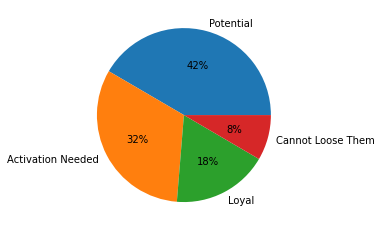

In [23]:
plt.pie(RFMSegmentation.RFM_Level.value_counts(),
        labels=RFMSegmentation.RFM_Level.value_counts().index,
        autopct='%.0f%%')
plt.show()